<a href="https://colab.research.google.com/github/Sergio-Rodriguez24/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales

<H7>Sergio Rodriguez</H7>



## Project Overview


##Imports


In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Using three seaborn styles: dark_background, seaborn-deep and seaborn-poster.
plt.style.use(['dark_background','seaborn-deep', 'seaborn-poster'])

<ipython-input-2-fc7504aefc02>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-deep', 'seaborn-poster'])
<ipython-input-2-fc7504aefc02>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-deep', 'seaborn-poster'])


## Load and Inspect Data


In [ ]:
#import sale prediction
df_sp = pd.read_csv('/content/drive/MyDrive/CodingDojo data import/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')

# look at the info with in the DB
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#preview to make sure import correct
df_sp.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df_sp.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Data cleaning


In [ ]:
#row/col in df
df_sp.shape

(8523, 12)

In [ ]:
df_sp.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# of the duplicated rows (including the first)
duplicated_rows_all = df_sp.duplicated(keep=False)
duplicated_rows_all.sum()

0

In [ ]:
#identify missing value
null_sum = df_sp.isna().sum()
null_sum[null_sum>0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [ ]:
#identify % of missing
null_percent = null_sum/len(df_sp) *100
null_percent[null_percent>0]

Item_Weight    17.165317
Outlet_Size    28.276428
dtype: float64

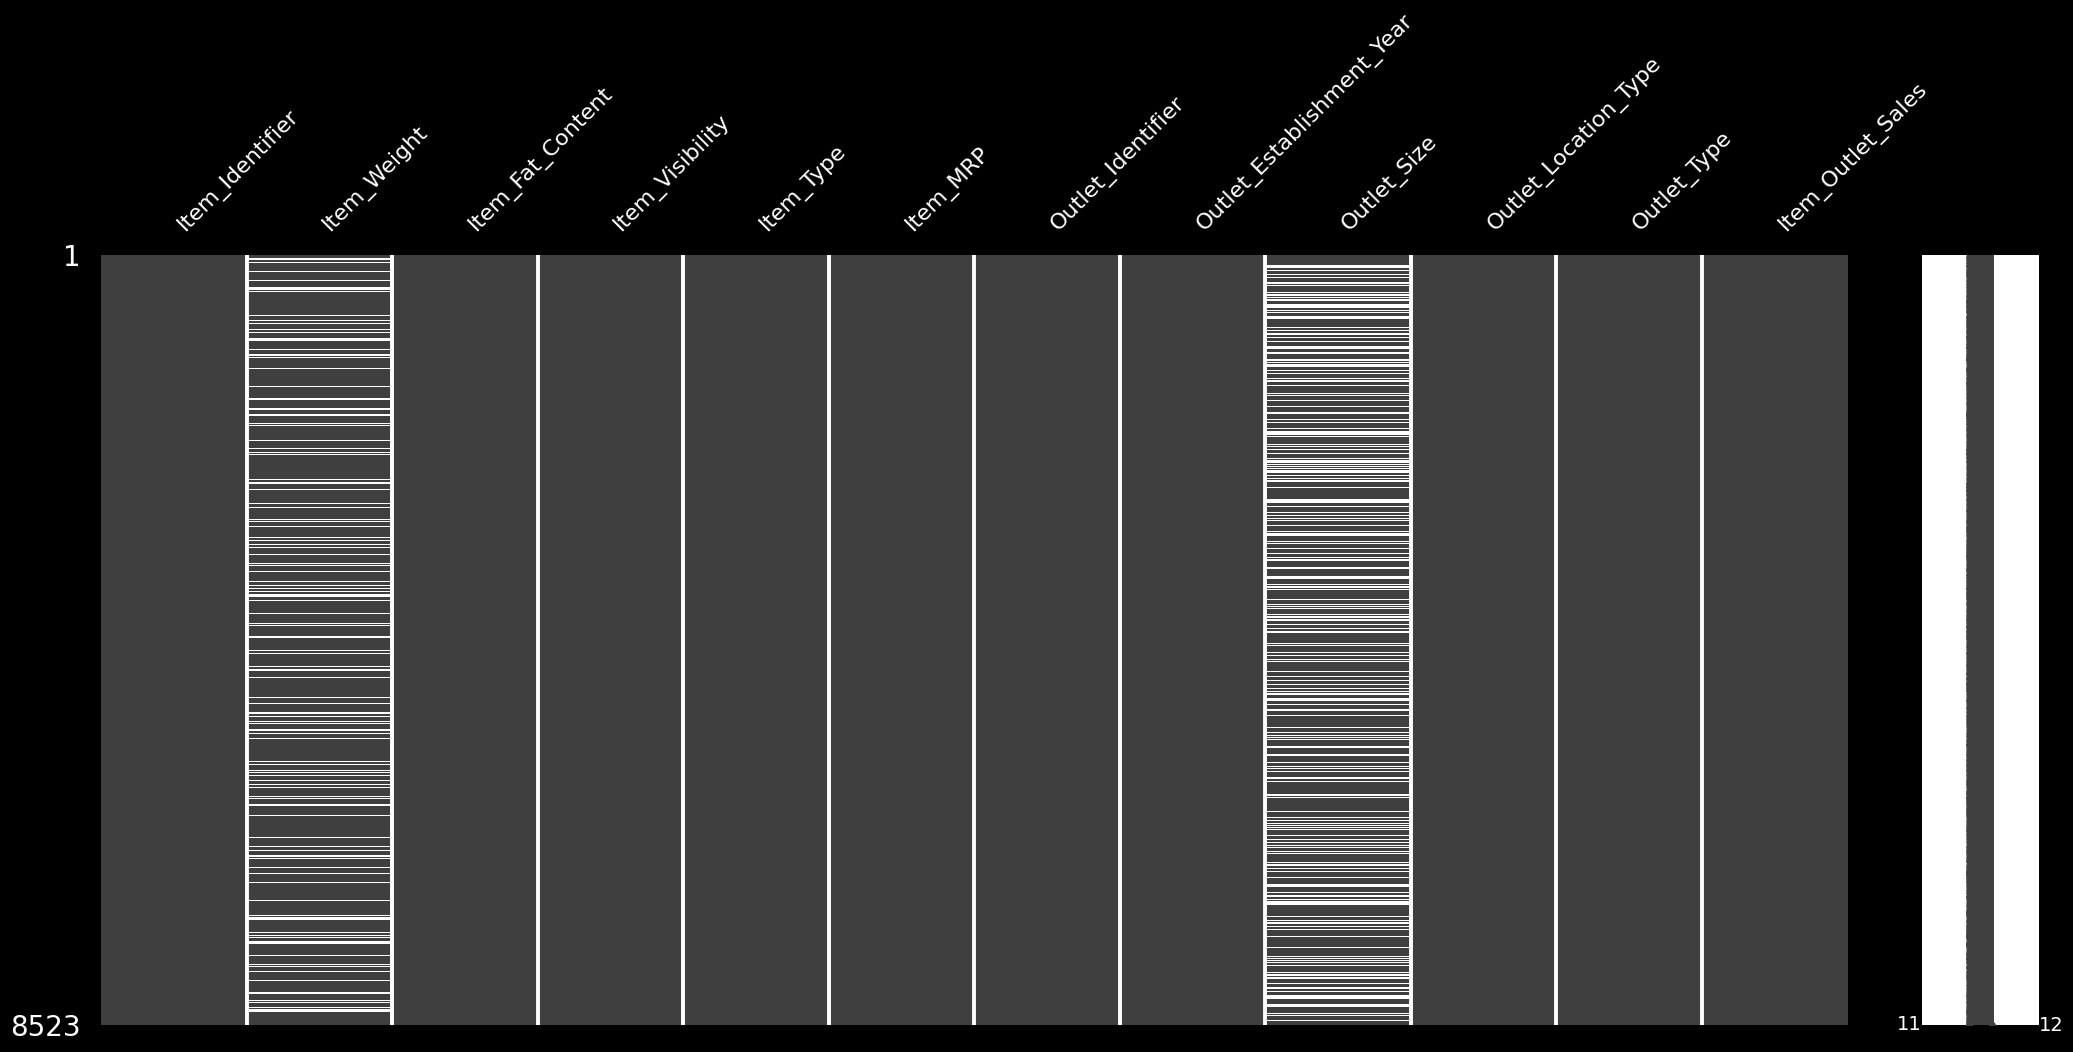

In [ ]:
#Visualizing Null Values with missingno
msno.matrix(df_sp);

In [ ]:
## Looking for missing value in categorial column
cat_col = df_sp.select_dtypes('object').columns
df_sp [cat_col].isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [ ]:
#Place holder value Missing for Outlet_size
df_sp[cat_col] = df_sp[cat_col].fillna('Missing')
#checking
df_sp[cat_col].isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [ ]:
## Looking for missing value in numerical columns column
num_col = df_sp.select_dtypes('number').columns
df_sp [num_col].isna().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Create a filter for null values
null_item_weight  =df_sp['Item_Weight'].isna()
# Use the filter to display only the rows with null values in item wieght
df_sp[null_item_weight]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [ ]:
# Changing this value to a null value by using np.nan
df_sp.loc[null_item_weight, 'Item_Weight'] = np.nan
#filling value as -1
df_sp['Item_Weight'] = df_sp['Item_Weight'].fillna(-1)
#checkin
df_sp['Item_Weight'].isna().sum()

0

<Axes: >

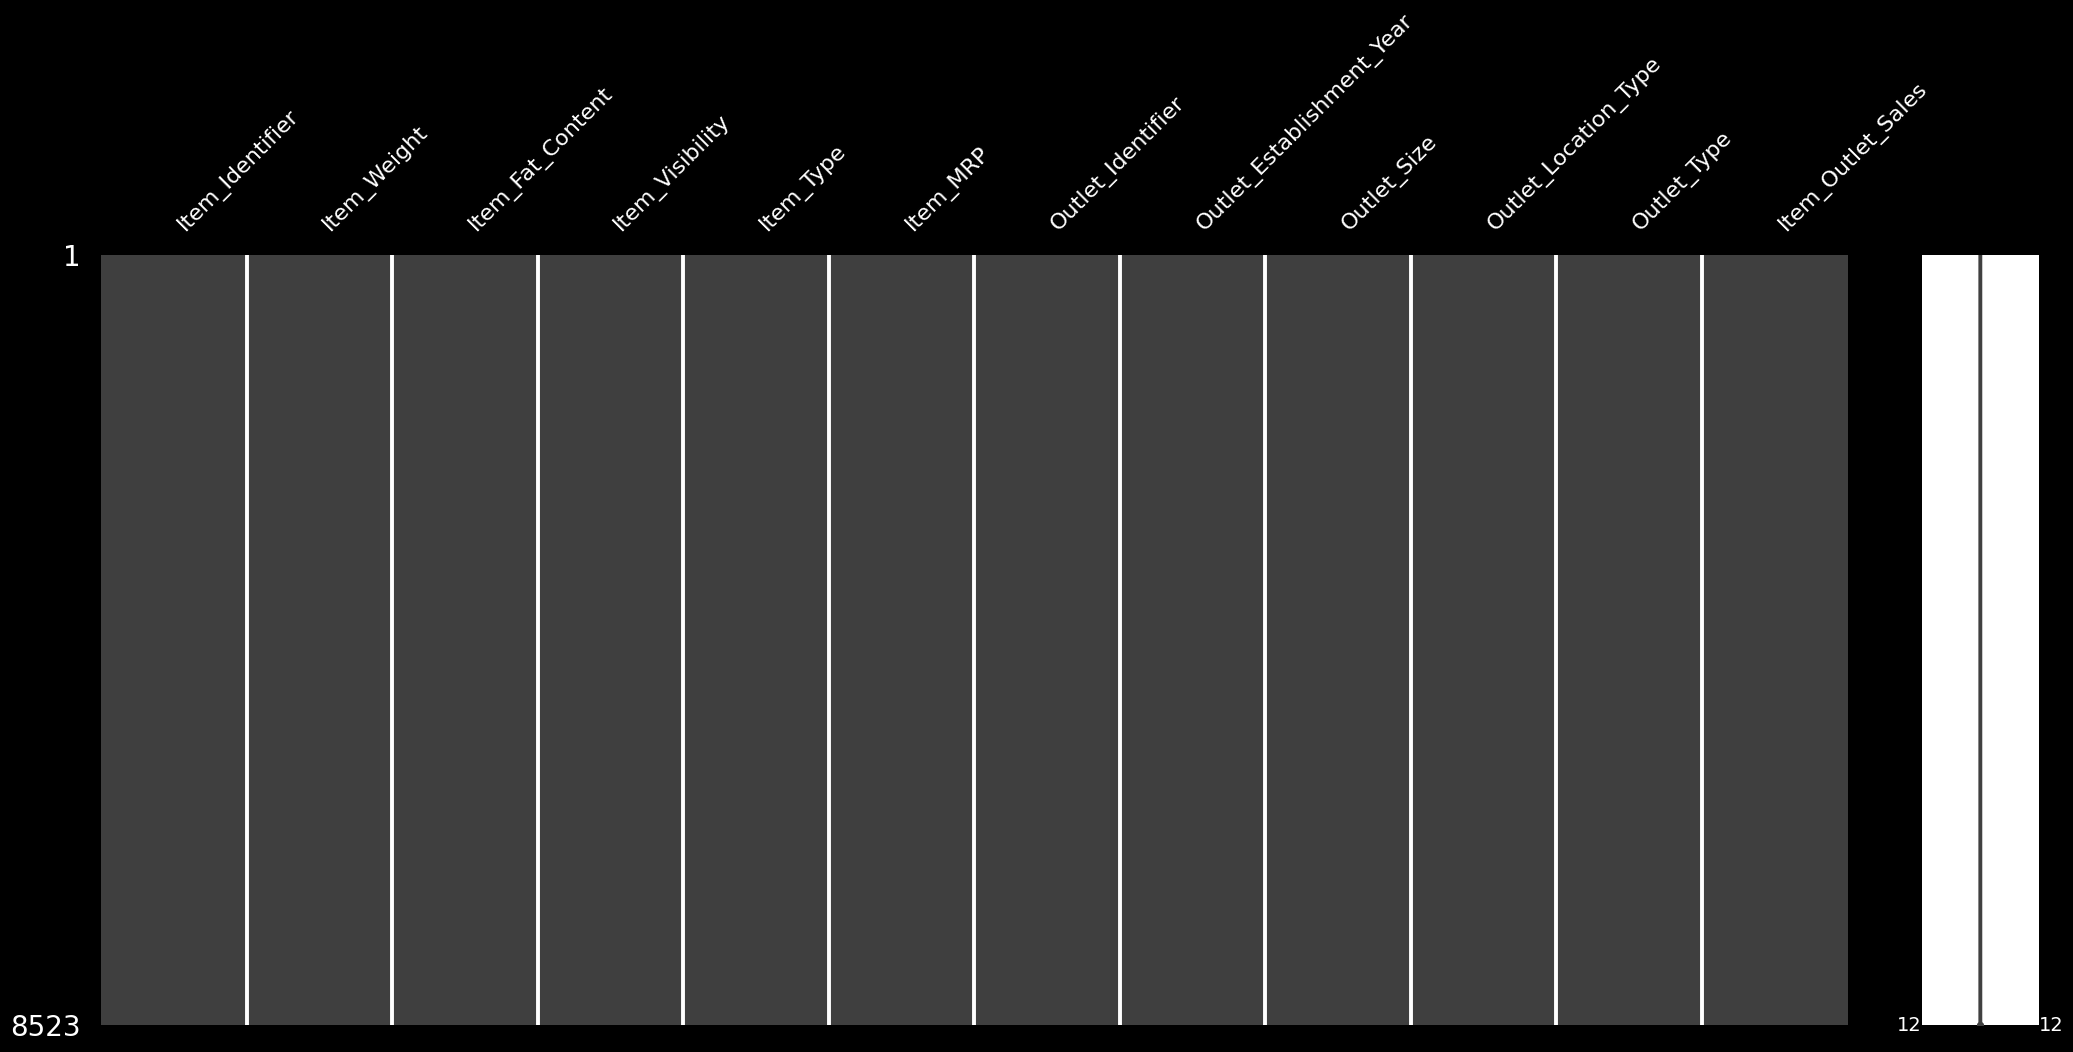

In [ ]:
# Confirm no more nulls using using missingno
msno.matrix(df_sp)

In [ ]:
# Saving list of object columns
incon_col = df_sp.select_dtypes('object').columns
incon_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# Checking for  inconsistent
for col in incon_col:
  print(f'Value count for {col}')
  print(df_sp[col].value_counts())
  print('\n')

Value count for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value count for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value count for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value count for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT0

In [ ]:
# Changed Outlet_Size from high to Large to better fit the rest of the naming
df_sp['Outlet_Size'] = df_sp['Outlet_Size'].replace({'High':'Large'})
df_sp['Outlet_Size'].value_counts()

Medium     2793
Missing    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64

In [ ]:
# Changed Item_fat names to match
df_sp ['Item_Fat_Content'] =df_sp ['Item_Fat_Content'].replace({'reg': 'Regular', 'LF' :'Low Fat', 'low fat': 'Low Fat'})
df_sp ['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df_sp.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis


In [ ]:
#Checking info
# Checking info again
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
## Custom fuction to plot histogram and boxplots
def plot_numeric(df_sp,col):
  fig, axes = plt.subplots(nrows=2, figsize=(8,4),sharex=True)

  sns.histplot(data=df_sp,x = col, ax =axes[0])
  mean_value = df_sp[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = ${mean_value:,.2f}",);

  med_value = df_sp[col].median()
  axes[0].axvline(med_value,color='g', ls='--',
           label=f"Median Value = ${med_value:,.2f}");

  sns.boxplot(data=df_sp, x = col, ax = axes[1])

  ## Title for each graph
  axes[0].set_title(f'EDA for {col}')


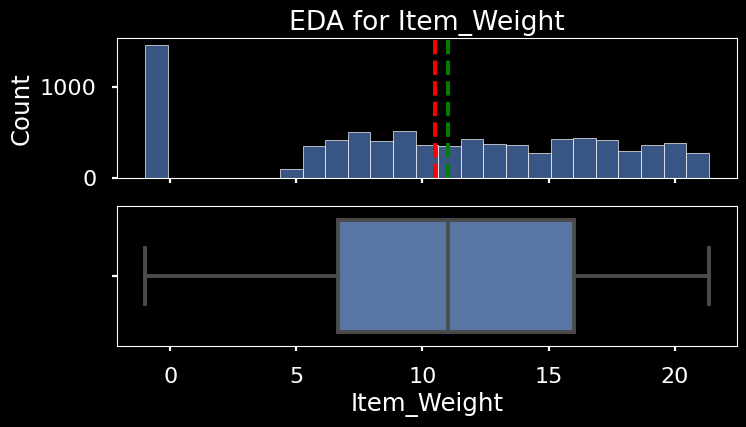

In [ ]:
plot_numeric(df_sp,'Item_Weight')

- The mean is just over 10 for this column even though we have a large amount of items under a pound.

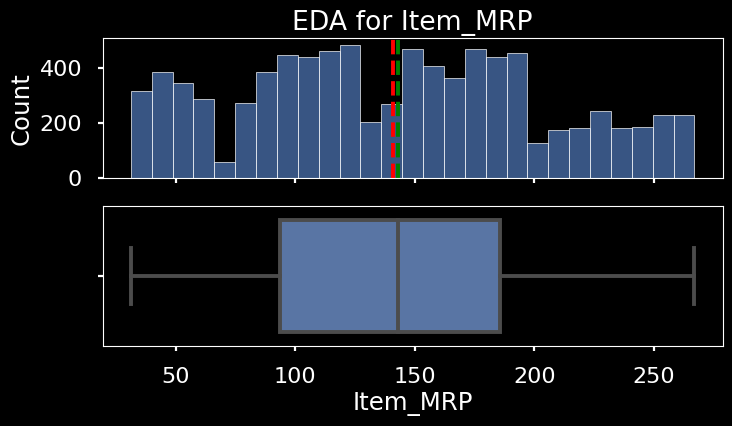

In [ ]:
plot_numeric(df_sp,'Item_MRP')

- Item MRP if a little less than 150

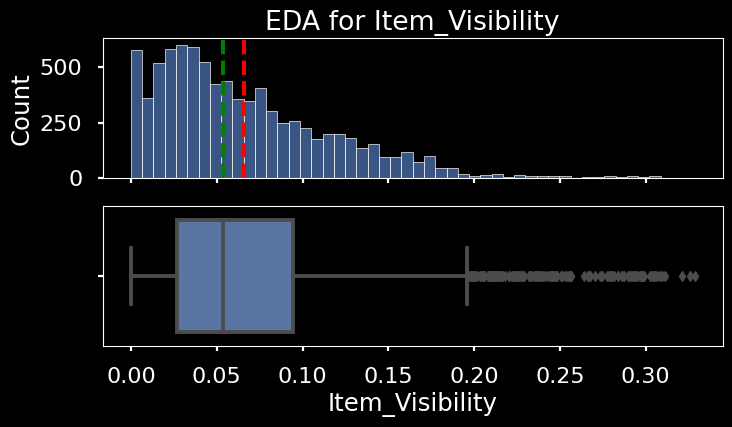

In [ ]:
plot_numeric(df_sp,'Item_Visibility')

- You can clearly see that the median is around .06 per item
- The boxplot shows that there are some outliers in this section. These are most valid with items on display


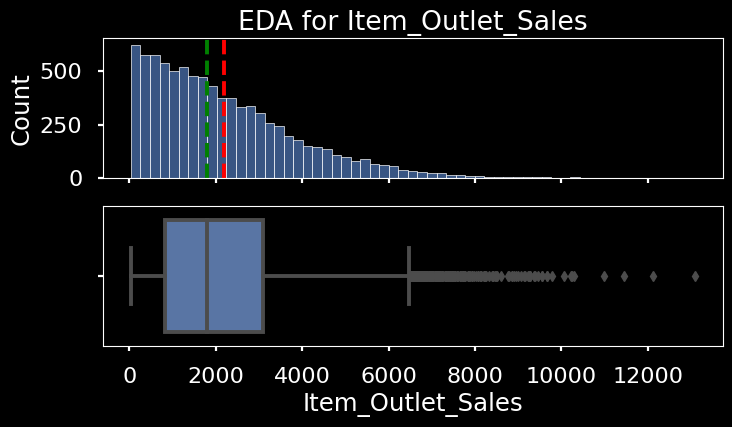

In [ ]:
plot_numeric(df_sp,'Item_Outlet_Sales')

- The mean of Outlet sales lies around 2,000
-The boxplot shows that there are some outliers in this section.

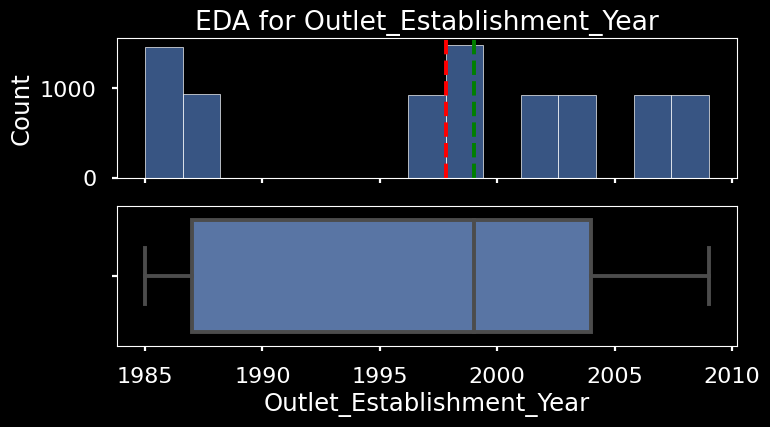

In [ ]:
plot_numeric(df_sp,'Outlet_Establishment_Year')

- We can see a large amount of stores were open 2,000 with stores opening remianing consitent over the years with small gaps in between

In [ ]:
corr=df_sp.corr(numeric_only=True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


Visualizing with Countplots

Did not include Item_Identifier due to haveing so many unique var

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


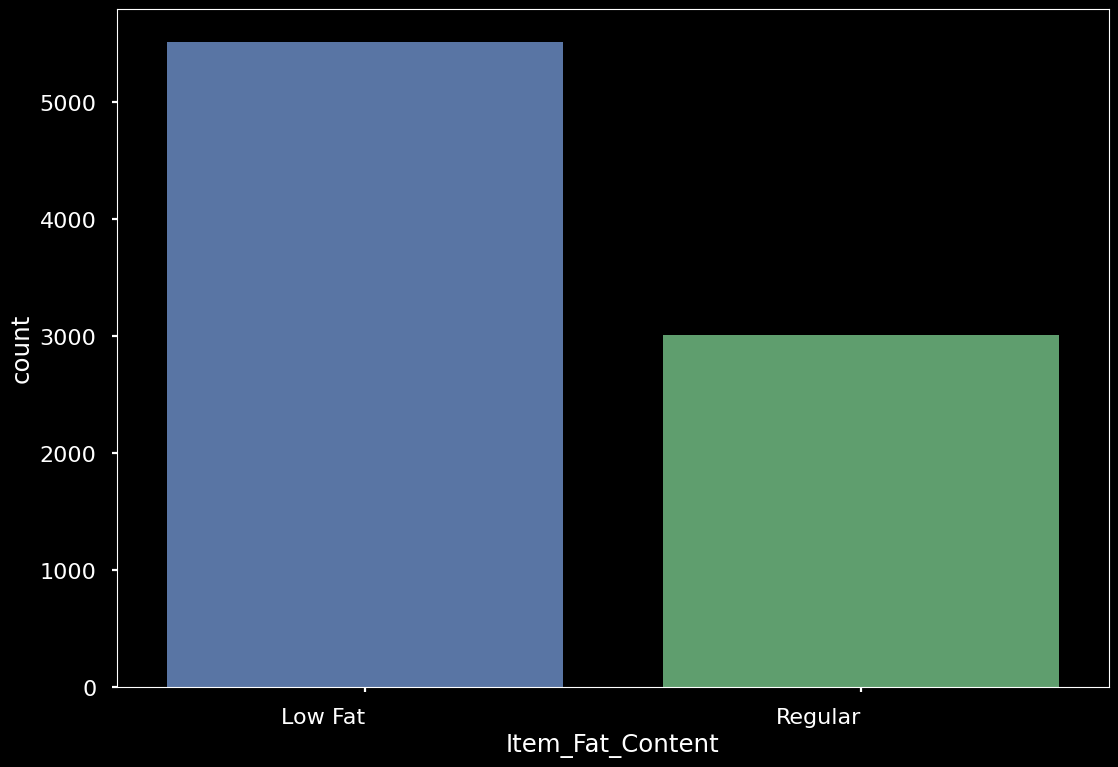

In [ ]:
ax = sns.countplot(data=df_sp, x='Item_Fat_Content')
ax.set_xticklabels(ax.get_xticklabels(), ha='right');
print(df_sp['Item_Fat_Content'].value_counts())

- From this graph, we can see that Low fat make up the majority of milk sales

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


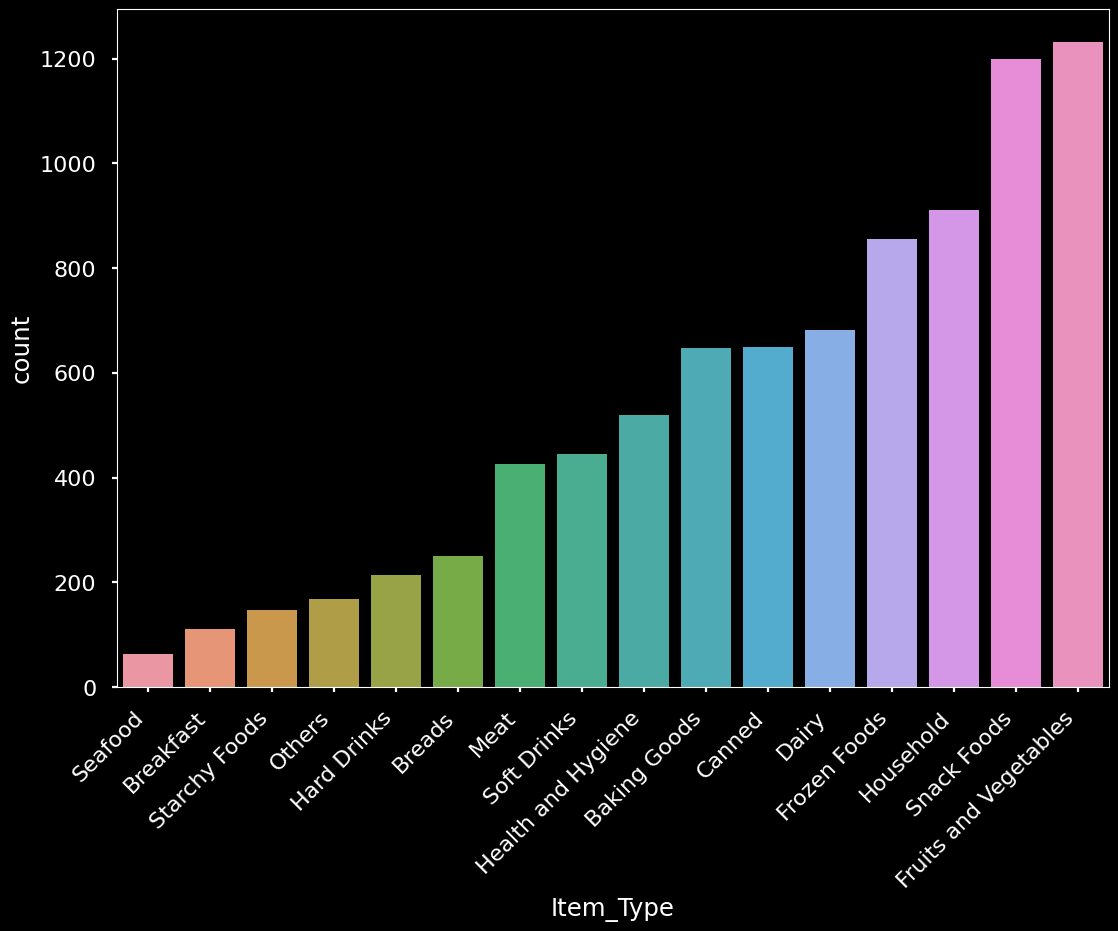

In [ ]:
ax = sns.countplot(data=df_sp, x='Item_Type',order=df_sp['Item_Type'].value_counts(ascending=True).index.value_counts(ascending=True).index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
print(df_sp['Item_Type'].value_counts())

- From this graph, we can see that the top 3 items we have is:
 - Household items
 - Snack food
 - Fruits and Vegteables as number 1

- We can also see the lowest 3 items types would be:
  - Seafood as the lowest followed by
  - Breakfast
  - Starchy Foods

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


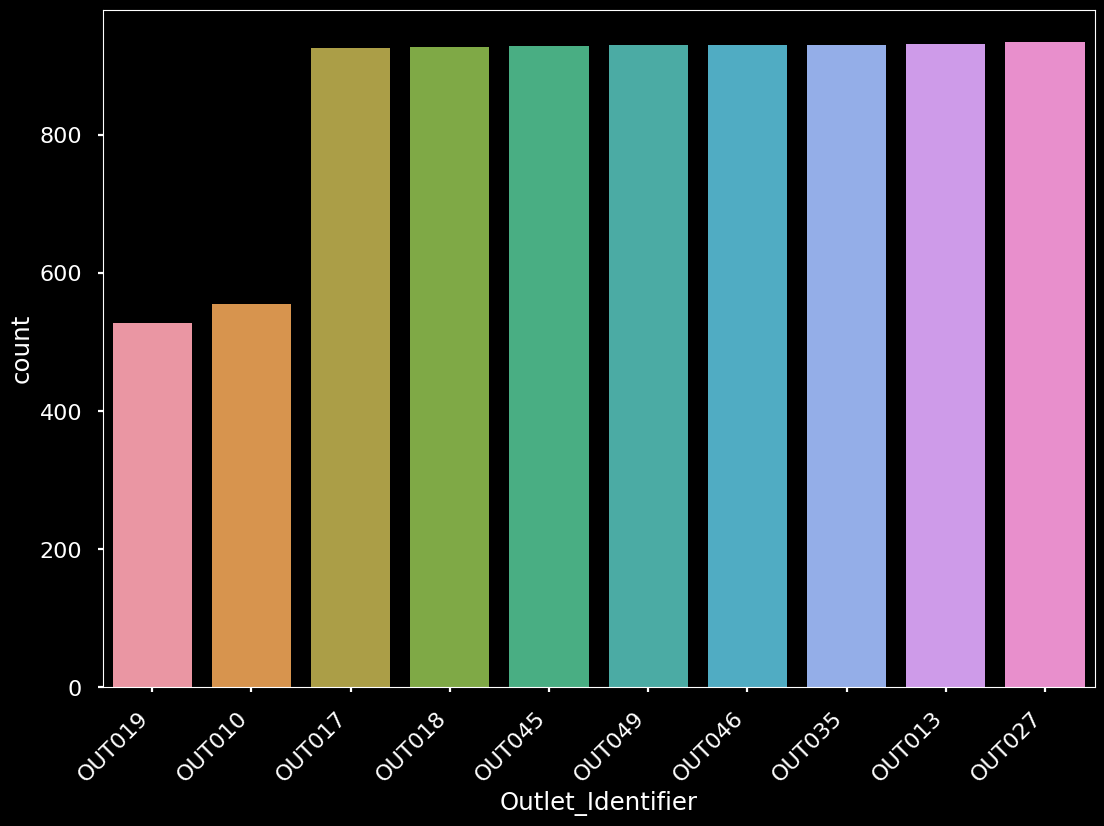

In [ ]:
ax = sns.countplot(data=df_sp, x='Outlet_Identifier',order=df_sp['Outlet_Identifier'].value_counts(ascending=True).index.value_counts(ascending=True).index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
print(df_sp['Outlet_Identifier'].value_counts())

Medium     2793
Missing    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64


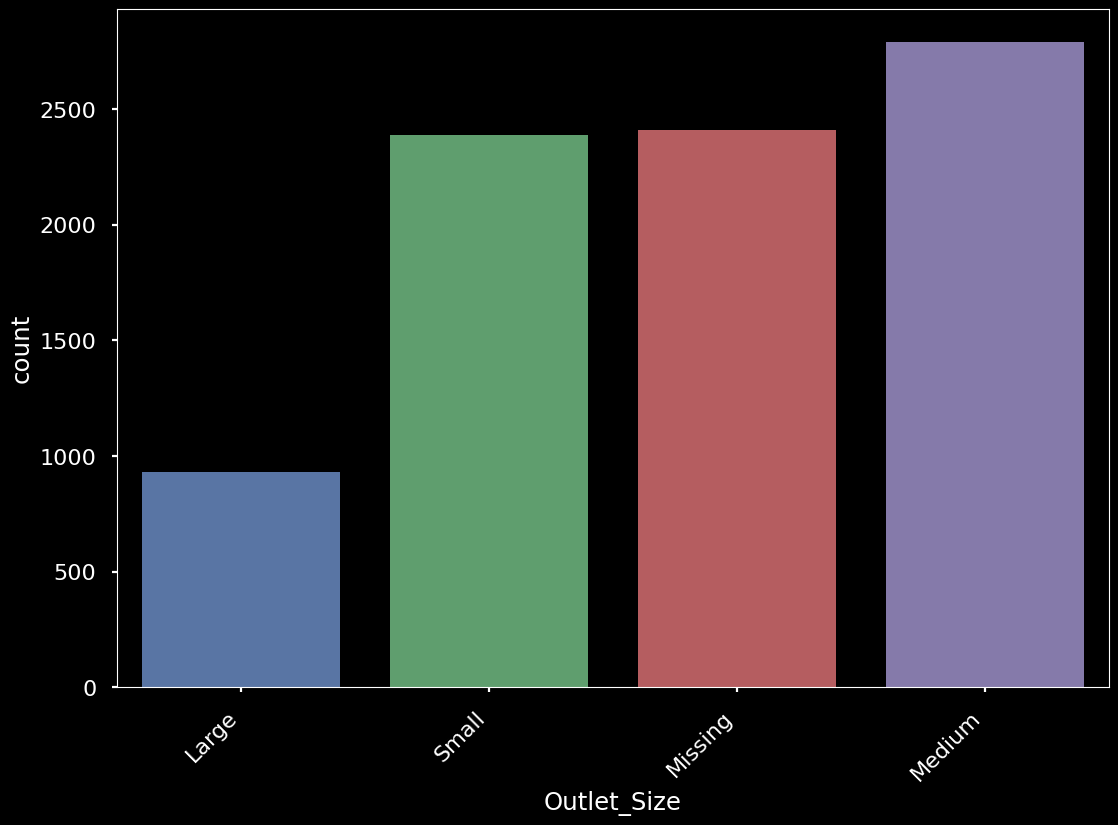

In [ ]:
ax = sns.countplot(data=df_sp, x='Outlet_Size',order=df_sp['Outlet_Size'].value_counts(ascending=True).index.value_counts(ascending=True).index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
print(df_sp['Outlet_Size'].value_counts())

- We are able to see we are missing a large amount of data

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


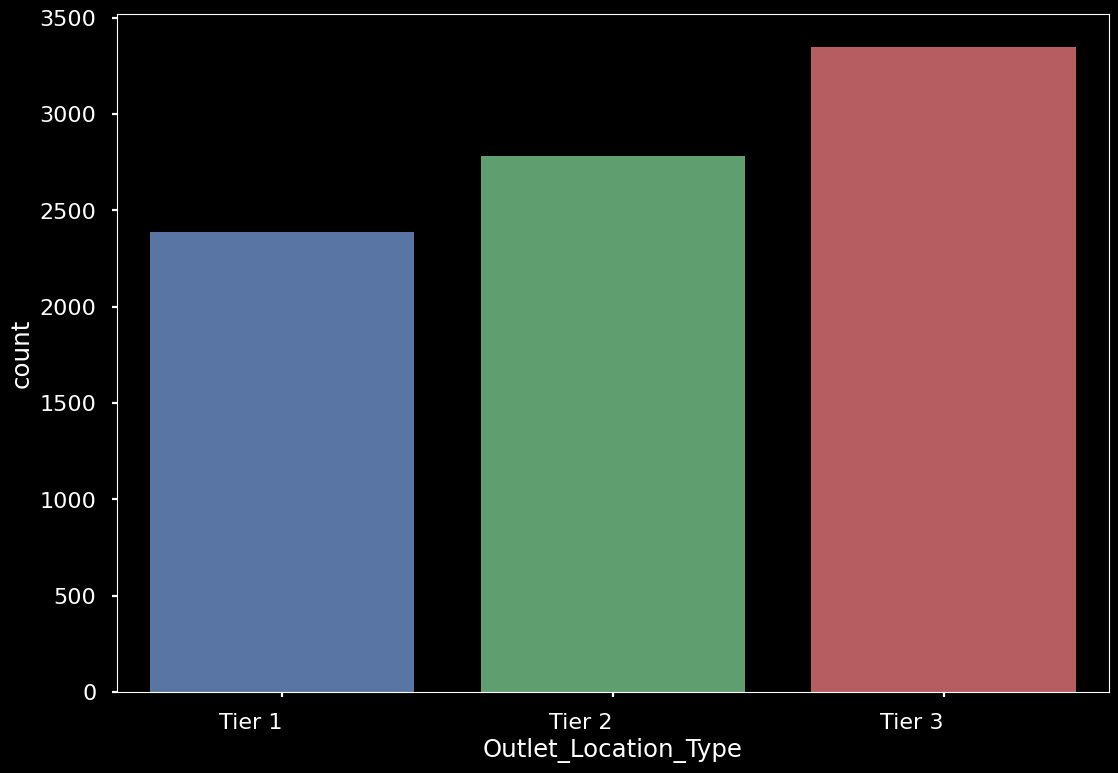

In [ ]:
ax = sns.countplot(data=df_sp, x='Outlet_Location_Type',order=df_sp['Outlet_Location_Type'].value_counts(ascending=True).index.value_counts(ascending=True).index)
ax.set_xticklabels(ax.get_xticklabels(), ha='right');
print(df_sp['Outlet_Location_Type'].value_counts())

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


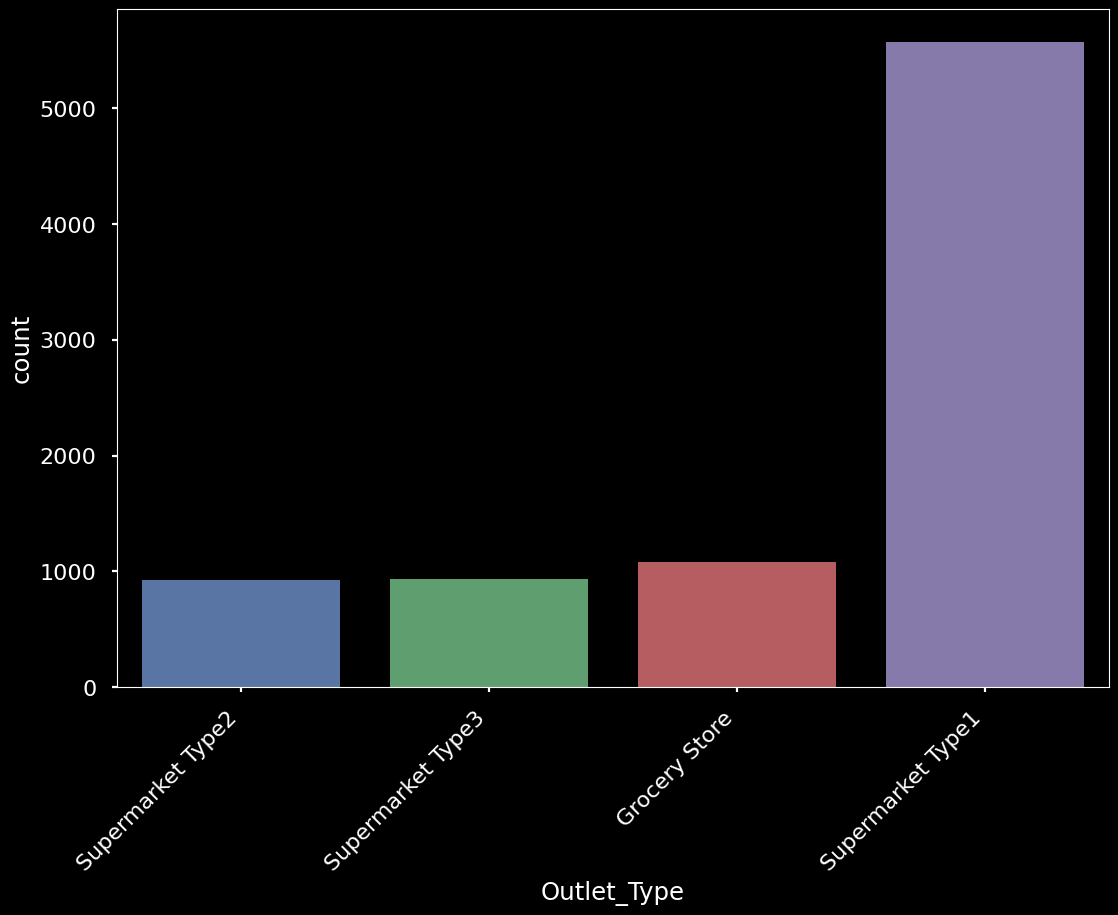

In [ ]:
ax = sns.countplot(data=df_sp, x='Outlet_Type',order=df_sp['Outlet_Type'].value_counts(ascending=True).index.value_counts(ascending=True).index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
print(df_sp['Outlet_Type'].value_counts())

From this graph, we can see that the largest Outlet type would be Supermarket Type 1 with it making up over 50% of the stores

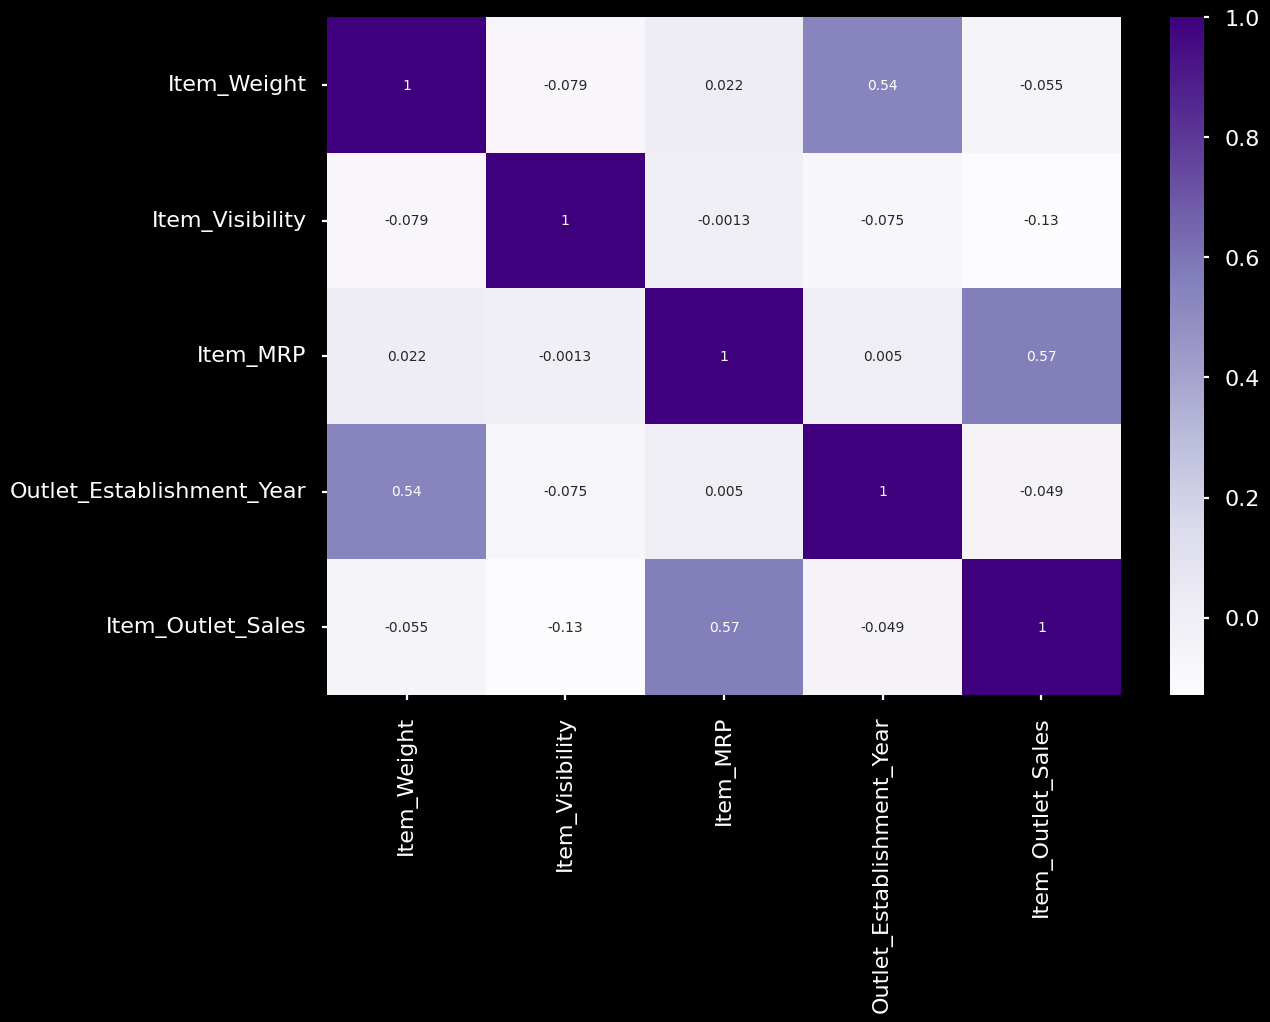

In [ ]:
sns.heatmap(corr, cmap = 'Purples', annot = True);


- There is a moderate postive correlation between the Item_MRP and Item_Outlet_slaes
- All of the other correlations are negligible.

## Explanatory Data Analysis

